# Modeling patients symptoms to predict if they have diabetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
"""df2 is the dataframe with the diabetes data."""

df2 = pd.read_csv('diabetes_data.csv', header=0, delimiter=';')
df2.head()
df2.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [3]:
matplotlib.style.use('default')  # To change the plot style of matplotlib (see https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

<AxesSubplot:xlabel='age', ylabel='class'>

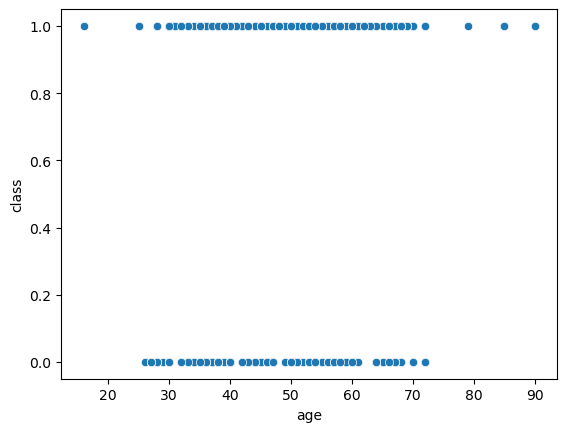

In [4]:
"""Scatterplot of age vs diabetes(class)
a class of 1 means that the patient has diabetes while a class of 0 is negative."""

sns.scatterplot(data=df2, x='age', y='class')  

In [5]:
print(df2['gender']) # See that gender is stored as a string

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
515    Female
516    Female
517    Female
518    Female
519      Male
Name: gender, Length: 520, dtype: object


In [6]:
def gender(gen):
    """Changing the gender in the dataframe to be 0 and 1 from string format.
    0 is Female and 1 is Male.
    
    To be used with df.apply()"""
    if gen == 'Female':
        return 0
    elif gen == 'Male':
        return 1
    else:
        raise NameError('Gender')

df2['gender'] = df2['gender'].apply(gender)

print(df2['gender'])

0      1
1      1
2      1
3      1
4      1
      ..
515    0
516    0
517    0
518    0
519    1
Name: gender, Length: 520, dtype: int64


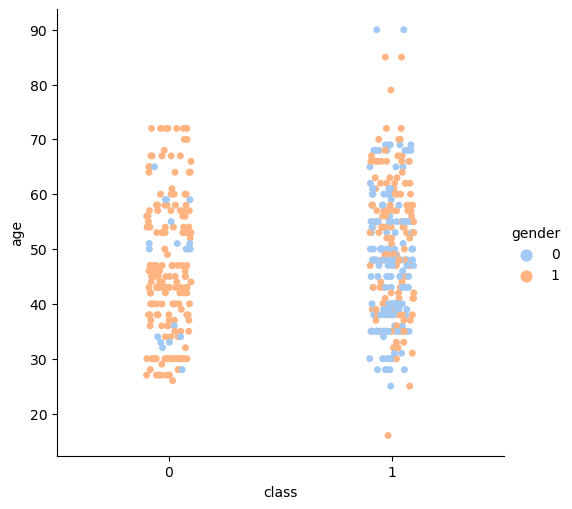

In [7]:
sns.catplot(x="class", hue="gender", y='age', palette="pastel", edgecolor=".6", data=df2)

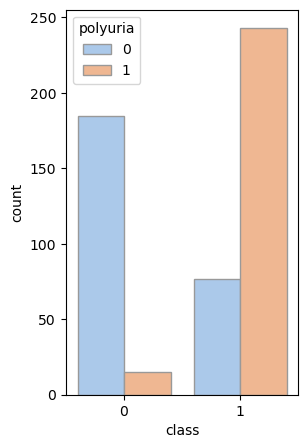

<Figure size 640x480 with 0 Axes>

In [8]:
"""Testing the size to see what is the minimum to properly fit the contents."""

fig, ax = plt.subplots(figsize=(3,5))
sns.countplot(ax=ax, x="class", hue="polyuria", palette="pastel", edgecolor=".6", data=df2)
plt.show()
plt.savefig('polyuria.png')

In [9]:
cols = list(df2.columns.values.tolist())
cols = cols[1:-1] # Removing the first and last columns which are age and class (for plotting purposes).
print(cols)

['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


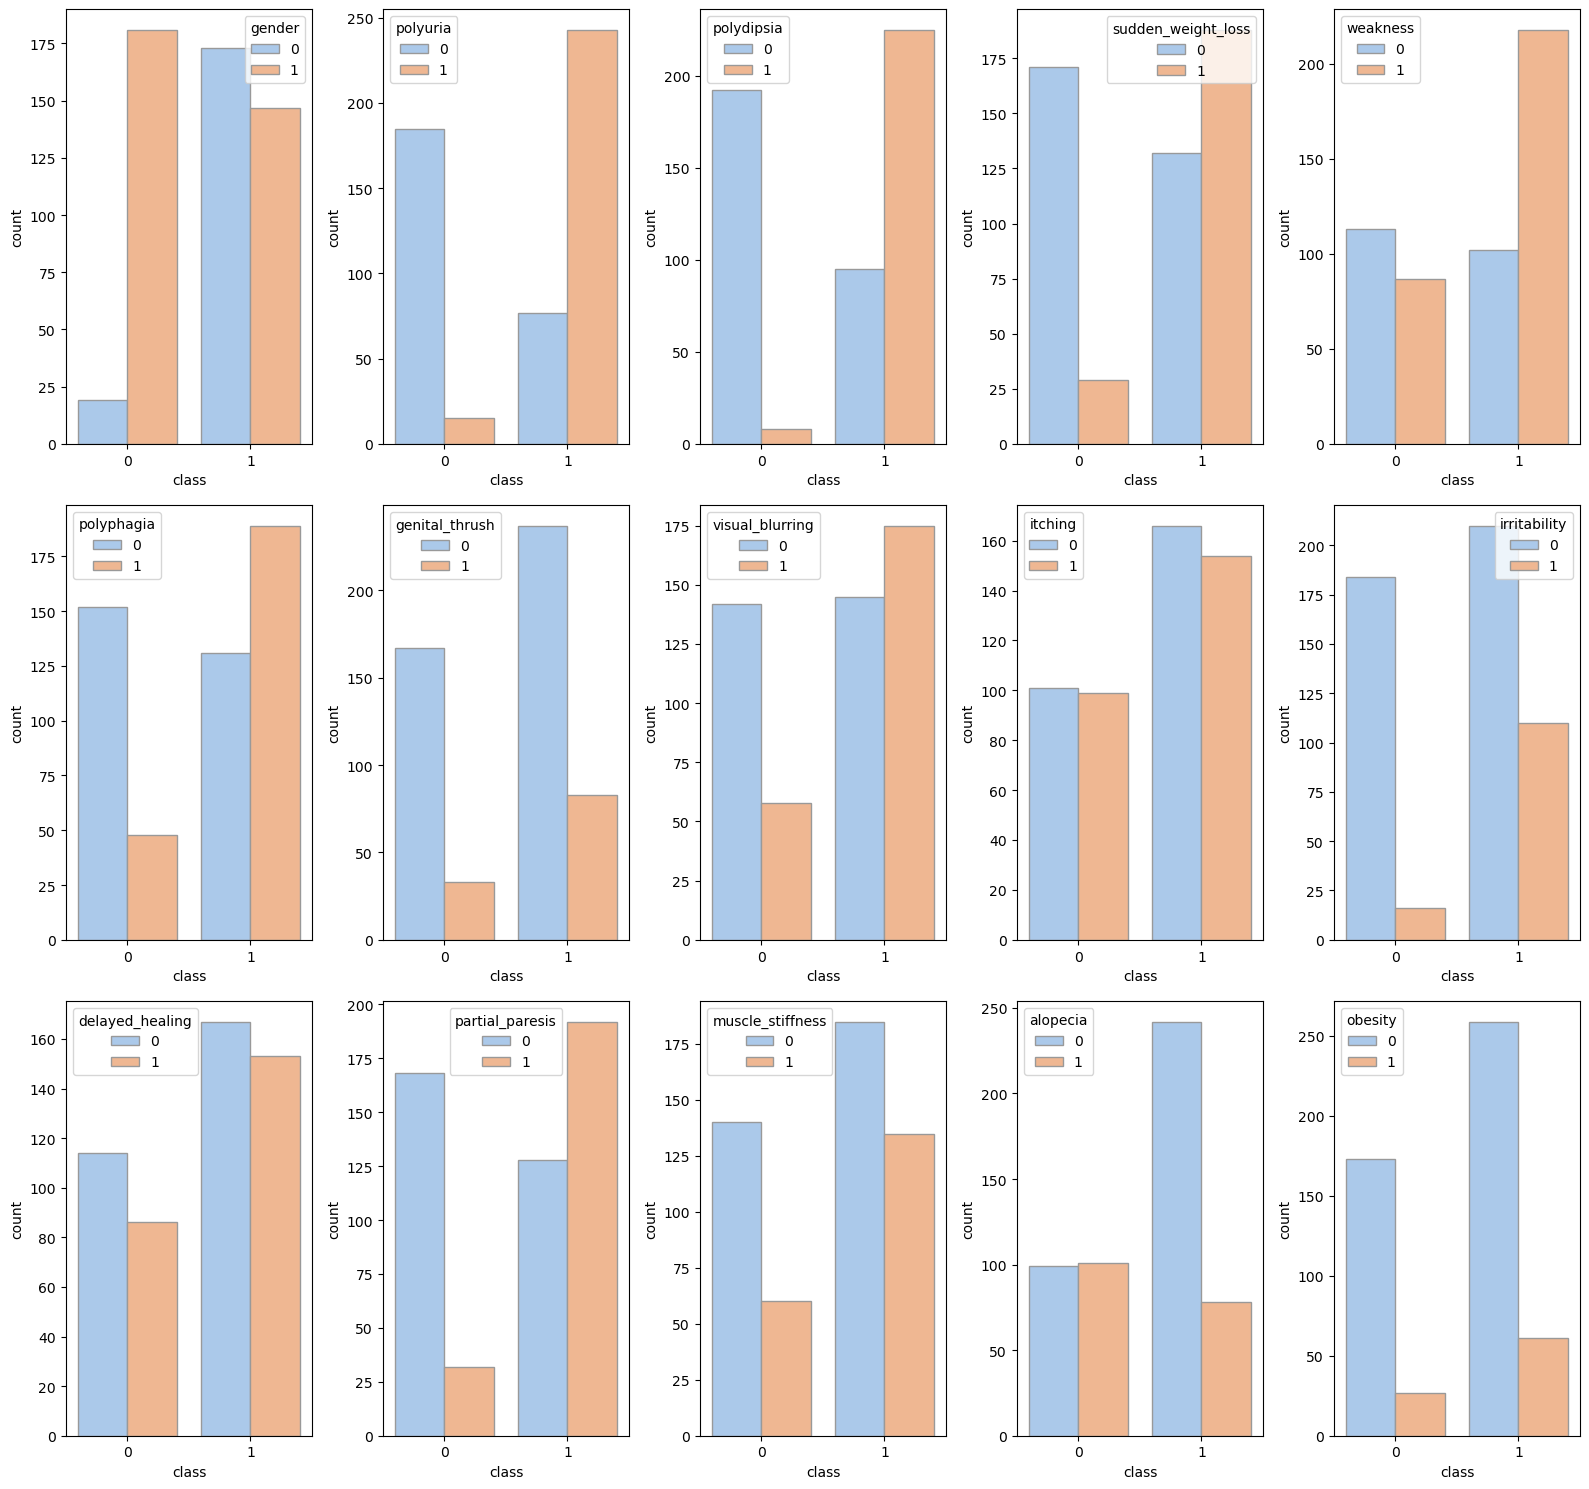

In [28]:
"""Batch plotting for each feature except age."""

fig, axs = plt.subplots(3,5, figsize=(16,15))

axs = axs.flatten()

for i in range(15):
    axs[i] = sns.countplot(ax=axs[i], x="class", hue=cols[i], palette="pastel", edgecolor=".6", data=df2)

plt.tight_layout()
plt.savefig('diabetes_data_countplot.pdf')

### There is some obvious symptoms that trend towards the paient to have diabetes.

In [ ]:
# Check the correlation between diabetes and all of the features.
print(df2.corr()['class'])

age                   0.108679
gender               -0.449233
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
weakness              0.243275
polyphagia            0.342504
genital_thrush        0.110288
visual_blurring       0.251300
itching              -0.013384
irritability          0.299467
delayed_healing       0.046980
partial_paresis       0.432288
muscle_stiffness      0.122474
alopecia             -0.267512
obesity               0.072173
class                 1.000000
Name: class, dtype: float64


In [ ]:
df2.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Start the modeling here.

In [ ]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

### Scale age so it is the same scale as the rest of the data.

In [ ]:
scale = MinMaxScaler()
df3 = df2.drop(['class'], axis=1)
X = scale.fit_transform(df3) # Scaling the data from 0 to 1. All the features are now floats.
X = pd.DataFrame(data=X, columns=df3.columns)
print(X.head())

y = df2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0  0.324324     1.0       0.0         1.0                 0.0       1.0   
1  0.567568     1.0       0.0         0.0                 0.0       1.0   
2  0.337838     1.0       1.0         0.0                 0.0       1.0   
3  0.391892     1.0       0.0         0.0                 1.0       1.0   
4  0.594595     1.0       1.0         1.0                 1.0       1.0   

   polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0         0.0             0.0              0.0      1.0           0.0   
1         0.0             0.0              1.0      0.0           0.0   
2         1.0             0.0              0.0      1.0           0.0   
3         1.0             1.0              0.0      1.0           0.0   
4         1.0             0.0              1.0      1.0           1.0   

   delayed_healing  partial_paresis  muscle_stiffness  alopecia  obesity  
0              1.0              0.0

## Start with a decision tree regressor and then compare to different models.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
tre = dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)

print('Decision Tree results:')
print(confusion_matrix(y_test, dt_pred))
# [[TruePositive FalsePositive]
#  [FalseNegative TrueNegative]]
print(classification_report(y_test, dt_pred))

Decision Tree results:
[[52  2]
 [ 3 99]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.98      0.97      0.98       102

    accuracy                           0.97       156
   macro avg       0.96      0.97      0.96       156
weighted avg       0.97      0.97      0.97       156



Feature: 0, Score: 0.07863
Feature: 1, Score: 0.10727
Feature: 2, Score: 0.45269
Feature: 3, Score: 0.07551
Feature: 4, Score: 0.02549
Feature: 5, Score: 0.00972
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02139
Feature: 8, Score: 0.01487
Feature: 9, Score: 0.00887
Feature: 10, Score: 0.02042
Feature: 11, Score: 0.03431
Feature: 12, Score: 0.01392
Feature: 13, Score: 0.04064
Feature: 14, Score: 0.06988
Feature: 15, Score: 0.02639


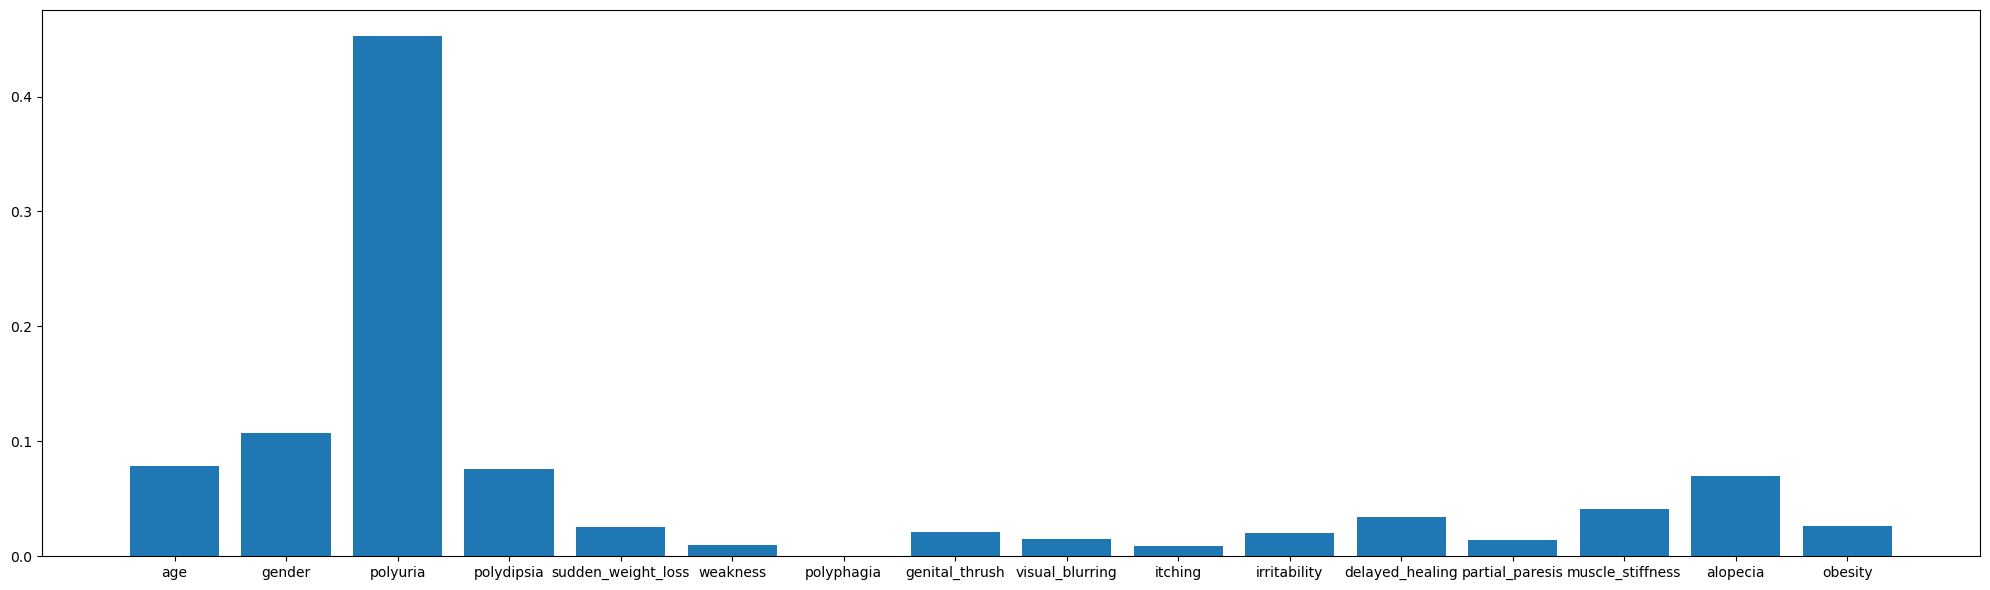

In [ ]:
"""Plotting the feature importance for each feature."""

importance = dtree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig = plt.figure(figsize=(20,6))
plt.bar([x for x in X.columns], importance)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib notebook
# To prevent the next plot from printing in the notebook.

""""Plotting the resulting model tree (see the pdf file).
See https://mljar.com/blog/visualize-decision-tree/ for more information."""

from sklearn import tree
fig, axs = plt.subplots(figsize=(50,40))
tree.plot_tree(tre, filled=True, fontsize=14, ax=axs)
plt.tight_layout()
plt.savefig('diabetes_data_tree.pdf', dpi=300)

<IPython.core.display.Javascript object>

In [ ]:
"""Testing the model with some features removed."""

X_train2 = X_train.drop(['polyphagia', 'visual_blurring', 'itching', 'obesity', 'weakness', 'partial_paresis'], axis=1)
X_test2 = X_test.drop(['polyphagia', 'visual_blurring', 'itching', 'obesity', 'weakness', 'partial_paresis'], axis=1)

dtree = DecisionTreeClassifier()
tre = dtree.fit(X_train2, y_train)
dt_pred = dtree.predict(X_test2)

print('Decision Tree results:')
print(confusion_matrix(y_test, dt_pred))
# [[TruePositive FalsePositive]
#  [FalseNegative TrueNegative]]
print(classification_report(y_test, dt_pred))

Decision Tree results:
[[52  2]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.98      0.95      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



### Removing the above features does not affect the average recall of the model.

### Now testing Random Forest Classifier.

In [ ]:
%matplotlib inline
# Back to the default plot style.

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfclass = RandomForestClassifier(n_estimators=100)
tre = rfclass.fit(X_train, y_train)
rf_pred = rfclass.predict(X_test)

print('Random Forest results:')
print(confusion_matrix(y_test, rf_pred))
# [[TruePositive FalsePositive]
#  [FalseNegative TrueNegative]]
print(classification_report(y_test, rf_pred))

Random Forest results:
[[ 54   0]
 [  1 101]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



Feature: 0, Score: 0.10335
Feature: 1, Score: 0.10364
Feature: 2, Score: 0.26835
Feature: 3, Score: 0.16869
Feature: 4, Score: 0.05627
Feature: 5, Score: 0.02005
Feature: 6, Score: 0.01984
Feature: 7, Score: 0.02196
Feature: 8, Score: 0.02631
Feature: 9, Score: 0.03409
Feature: 10, Score: 0.03146
Feature: 11, Score: 0.03102
Feature: 12, Score: 0.03338
Feature: 13, Score: 0.02466
Feature: 14, Score: 0.04251
Feature: 15, Score: 0.01441


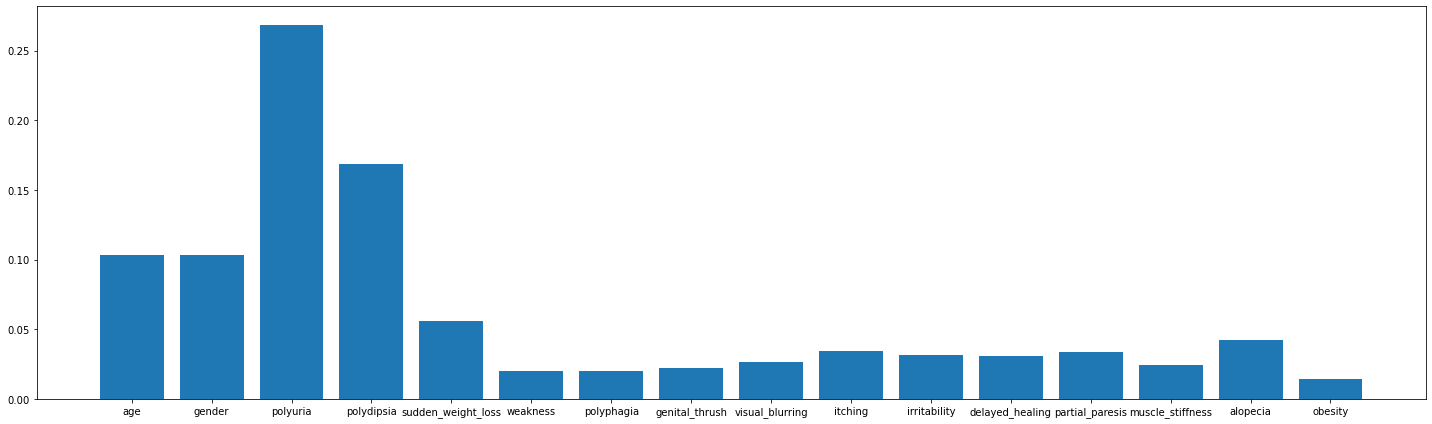

In [ ]:
importance = rfclass.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig = plt.figure(figsize=(20,6))
plt.bar([x for x in X.columns], importance)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
"""Use the random grid to search for best hyperparameters.
See https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html for hyperparameter options."""

# Selecting the hyperparameters and ranges to be tested.
params = {'criterion': ['gini', 'entropy'], 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 5), 'ccp_alpha': np.linspace(0.0, 1.0, 5)}

dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = params, cv = 5, verbose=2, random_state=42, n_iter=1000)
# Fit the random search model
dt_random.fit(X_train, y_train)

dt_random.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END ccp_alpha=0.75, criterion=gini, max_leaf_nodes=19, min_samples_split=2, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END ccp_alpha=0.75, criterion=gini, max_leaf_nodes=19, min_samples_split=2, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END ccp_alpha=0.75, criterion=gini, max_leaf_nodes=19, min_samples_split=2, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END ccp_alpha=0.75, criterion=gini, max_leaf_nodes=19, min_samples_split=2, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END ccp_alpha=0.75, criterion=gini, max_leaf_nodes=19, min_samples_split=2, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END ccp_alpha=0.75, criterion=gini, max_leaf_nodes=40, min_samples_split=4, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END ccp_alpha=0.75, criterion=gini, max_leaf_nodes=40, min_samples_split=4, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END ccp_alpha=0.75, 

{'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'max_leaf_nodes': 51,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [ ]:
dtree = DecisionTreeClassifier()
dtree.set_params(**dt_random.best_params_)
tre = dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)

print('Decision Tree results:')
print(confusion_matrix(y_test, dt_pred))
# [[TruePositive FalsePositive]
#  [FalseNegative TrueNegative]]
print(classification_report(y_test, dt_pred))

Decision Tree results:
[[ 52   2]
 [  2 100]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



### Additional models with default hyperparameters:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
adam = ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

print('AdaBoost results:')
print(confusion_matrix(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

AdaBoost results:
[[48  6]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.94      0.95      0.95       102

    accuracy                           0.93       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.93      0.93      0.93       156



In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

gauss = GaussianProcessClassifier()
gaussm = gauss.fit(X_train, y_train)
gauss_pred = gauss.predict(X_test)

print('Gaussian Process results:')
print(confusion_matrix(y_test, gauss_pred))
print(classification_report(y_test, gauss_pred))

Gaussian Process results:
[[52  2]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.98      0.95      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



In [ ]:
from sklearn.neural_network import MLPClassifier

neural = MLPClassifier()
neuralm = neural.fit(X_train, y_train)
neural_pred = neural.predict(X_test)

print('neural network results:')
print(confusion_matrix(y_test, neural_pred))
print(classification_report(y_test, neural_pred))

neural network results:
[[51  3]
 [ 3 99]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97       102

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



C:\Users\dstra\miniconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Most of the models have similar result. Random forest is the best with only 1 false positive.